# Advanced Programme in Deep Learning (Foundations and Applications)
## A Program by IISc and TalentSprint

### Mini Project Notebook: Toxic Questions Classification using Deep Neural Networks.


## Learning Objectives

At the end of the mini-hackathon, you will be able to :

* perform data preprocessing/preprocess the text
* represent the text/words using the pretrained word embeddings - Word2Vec/Glove
* build the deep neural networks to classify the questions as Toxic/inappropriate or not


## Dataset

The challenge in this competition is to predict whether a question asked on a well known public forum/platform is Toxic/inappropriate or not.

A toxic/inappropriate question is defined as a question intended to make a statement and not with a purpose of looking for helpful/meaningful answers. The following are some of the characteristics that can signify that a question is irrelevant/inappropriate:

* Based on false information, or contains absurd assumptions
* Does not have a non-neutral tone
* Has an exaggerated tone to underscore a point about a group of people
* Is rhetorical and meant to imply a statement about a group of people
* Is disparaging or inflammatory against an individual or a group of people
* Uses sexual content (such as incest, pedophilia), and not to seek genuine answers
* Suggests a discriminatory idea against a protected class of people, or seeks confirmation of a stereotype
* Based on an unrealistic premise about a group of people
* Is not grounded in reality

The training dataset includes the questions 1044897 that was asked, and whether it was identified as toxic/inappropriate (target = 1) or as relevant/appropriate (target = 0). The test dataset consists of approximately 261000 questions.

The training data might be imbalanced or noisy. They are not guaranteed to be perfect. Please take the necessary actions/steps while building the model.


## Description

This dataset has the following information:

1. **qid** - unique question identifier
2. **question_text** - the text of the question asked in the well known public forum/platform
3. **target** - a question labeled "toxic/inappropriate" has a value of 1, otherwise 0



## Problem Statement

To perform classification of approximately 261000 questions asked on a well known public form using Deep Neural Networks such as RNN/CNN/BERT/LSTM as 'toxic/inappropriate' questions or 'relevant/appropriate' questions

## Grading = 10 Marks

Here is a handy link to Kaggle's competition documentation (https://www.kaggle.com/docs/competitions), which includes, among other things, instructions on submitting predictions (https://www.kaggle.com/docs/competitions#making-a-submission).

## Instructions for downloading train and test dataset from Kaggle API are as follows:

### 1. Create an API key in Kaggle.

To do this, go to the competition site on Kaggle at (https://www.kaggle.com/t/39d5b47817ec4e50b70652e5a7d7d65d) and click on user then click on your profile as shown below. Click Account.

![alt text](https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/Capture-NLP.PNG)

### 2. Next, scroll down to the API access section and click on **Create New Token** to download an API key (kaggle.json).

![alt text](https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/Capture-NLP_1.PNG)

### 3. Upload your kaggle.json file using the following snippet in a code cell:



In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shriharijalihal","key":"3865856a893e3d552b760d9dbe42233a"}'}

In [2]:
#If successfully uploaded in the above step, the 'ls' command here should display the kaggle.json file.
%ls

kaggle.json  sample_data/


### 4. Install the Kaggle API using the following command


In [3]:
!pip install -U -q kaggle==1.5.8

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 902.4 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.8/118.8 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchdata 0.7.0 requires urllib3>=1.25, but you have urllib3 1.24.3 which is incompatible.


### 5. Move the kaggle.json file into ~/.kaggle, which is where the API client expects your token to be located:



In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
# Execute the following command to verify whether the kaggle.json is stored in the appropriate location: ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [6]:
!chmod 600 /root/.kaggle/kaggle.json # run this command to ensure your Kaggle API token is secure on colab

### 6. Now download the Test Data from Kaggle

**NOTE: If you get a '404 - Not Found' error after running the cell below, it is most likely that the user (whose kaggle.json is uploaded above) has not 'accepted' the rules of the competition and therefore has 'not joined' the competition.**

If you encounter **401-unauthorised** download latest **kaggle.json** by repeating steps 1 & 2

In [7]:
#If you get a forbidden link, you have most likely not joined the competition.
!kaggle competitions download -c irrelevant-questions-classification

 99% 60.0M/60.6M [00:03<00:00, 21.9MB/s]
100% 60.6M/60.6M [00:03<00:00, 16.1MB/s]


In [8]:
!unzip /content/irrelevant-questions-classification.zip

Archive:  /content/irrelevant-questions-classification.zip
  inflating: sample_submission.csv   
  inflating: test_dataset.csv        
  inflating: train_dataset.csv       


## YOUR CODING STARTS FROM HERE

## Import required packages

In [9]:
!pip install keras


In [37]:
# Import required packages
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords # to get collection of stopwords
from nltk.tokenize import word_tokenize
import string
import gensim
import matplotlib.pyplot as plt

# layers of the architecture
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers import Bidirectional

from keras.preprocessing.text import Tokenizer # to encode text to int
from keras.models import Sequential   # the model
from keras.utils import pad_sequences # to do padding or truncating
from keras.models import load_model

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##   **Stage 1**:  Data Loading and Perform Exploratory Data Analysis (1 Points)

Is null:  False
Shape:  (1044897, 3)
                     qid                                      question_text  \
0   2549b81c4adff1849a7f                          Is CSE at bit Meara good?   
1   0558ed93a4630e68f7ac  Is it better to exercise before or after the b...   
2   5d72d5233059e44f8a8e  Can character naming in writing infringe on tr...   
3   3968636ac28841d0c901  Why does everyone making YouTube videos in Jap...   
4   201d2b9a777bbf25443f  Is there any relation between horse power and ...   
5   1aef266ada634c1cf20a          Was Edgar Cayce right about Donald Trump?   
6   a5b295d664c749254936  Which is better career between IIT/IIM profess...   
7   f9f20d5c3c9d8526709b  How is it progressive that Moana doesn't have ...   
8   2427efe409b114cd9e07  I'm only under 13, and I have little frown lin...   
9   f0f74560ba108949fbb9  How do I add more than one video (from drafts)...   
10  4d3435cd06ab85c5c519     What are some interesting places to intern at?   
11  0fa5548a1c6

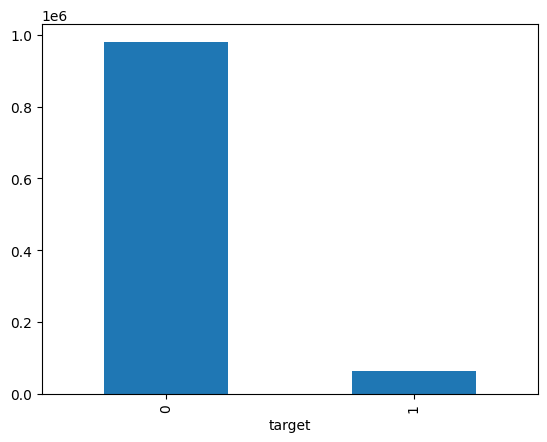

In [11]:
toxic_questions = pd.read_csv("train_dataset.csv")
print("Is null: ", toxic_questions.isnull().values.any())
print("Shape: ", toxic_questions.shape)
print(toxic_questions.head(15))
toxic_questions.groupby("target").target.count().plot.bar()
print(toxic_questions["question_text"][10])

##   **Stage 2**: Data Pre-Processing  (1 Points)

####  Clean and Transform the data into a specified format


In [12]:
def preprocess_text(sen):

    sen = re.sub('<.*?>', ' ', sen) # remove html tag

    tokens = word_tokenize(sen)  # tokenizing words

    tokens = [w.lower() for w in tokens]    # lower case

    table = str.maketrans('', '', string.punctuation)  # remove punctuations
    stripped = [w.translate(table) for w in tokens]

    words = [word for word in stripped if word.isalpha()]  # remove non alphabet
    stop_words = set(stopwords.words('english'))

    words = [w for w in words if not w in stop_words]   # remove stop words
    words = [w for w in words if len(w) > 2]  # Ignore words less than 2

    return words

In [13]:
# Store the preprocessed reviews in a new list
question_lines = []
sentences = list(toxic_questions['question_text'])

for sen in sentences:
    # Call the preprocess_text function on each sentence of the review text
    question_lines.append(preprocess_text(sen))

In [14]:
print(len(question_lines))

print(question_lines[3])

1044897
['everyone', 'making', 'youtube', 'videos', 'japan', 'subscribers', 'bad']


In [15]:
y = toxic_questions['target']
y = np.array(list(map(lambda x: 1 if x == 1 else 0, y)))
print(y, "length: ", len(y))

[0 0 0 ... 0 0 0] length:  1044897


##   **Stage 3**: Build the Word Embeddings using pretrained Word2vec/Glove (Text Representation) (1 Point)



In [16]:
EMBEDDING_DIM = 100

# Train word2vec model after preprocessing the reviews
model = gensim.models.Word2Vec(sentences=question_lines, vector_size=EMBEDDING_DIM, window=5, workers=4, min_count=1)
print(model)


Word2Vec<vocab=189080, vector_size=100, alpha=0.025>


In [17]:
words = list(model.wv.index_to_key)
print('Vocabulary size: %d' % len(words))

Vocabulary size: 189080


In [18]:
# Save model
filename = "toxicQuestion_embedding_word2vec.txt"
model.wv.save_word2vec_format(filename, binary=False)

In [19]:
import os

embeddings_index = {}
f = open(os.path.join('','toxicQuestion_embedding_word2vec.txt'), encoding="utf-8")

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:])
    embeddings_index[word] = coefs
f.close()

In [20]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(question_lines)
sequences = tokenizer.texts_to_sequences(question_lines)

In [21]:
word_index = tokenizer.word_index
print('Found %s unique tokens' % len(word_index))

# Only consider the first  100 words of each movie review
max_length = 100

review_pad = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')
sentiment = y

print('Shape of pad tensor:', review_pad.shape)
print('Shape of sentiment tensor', sentiment.shape)

Found 189080 unique tokens
Shape of pad tensor: (1044897, 100)
Shape of sentiment tensor (1044897,)


In [22]:
print(word_index)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [23]:
# Padded reviews
print(review_pad)

[[  529  1383 82154 ...     0     0     0]
 [   30  1472  4750 ...     0     0     0]
 [  551  6843   241 ...     0     0     0]
 ...
 [   87  1485   640 ...     0     0     0]
 [  479  2573  1220 ...     0     0     0]
 [   18    74   652 ...     0     0     0]]


In [24]:
vocab_size = len(word_index) + 1

# Create a weight matrix for words in the training data
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))

for word, index in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    # If words not found in embedding matrix will be all 0's
    embedding_matrix[index, :] = embedding_vector

In [25]:
print(vocab_size)

189081


In [26]:
EMBEDDING_DIM = 100

# Define Model
model = Sequential()
embedding_layer = Embedding(vocab_size,
                            EMBEDDING_DIM,
                            weights = [embedding_matrix],
                            input_length = max_length,
                            trainable=False)
model.add(embedding_layer)
model.add(LSTM(32, dropout=0.3, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

In [27]:
print('Summary of the built model...')
print(model.summary())

Summary of the built model...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          18908100  
                                                                 
 lstm (LSTM)                 (None, 32)                17024     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 18925157 (72.19 MB)
Trainable params: 17057 (66.63 KB)
Non-trainable params: 18908100 (72.13 MB)
_________________________________________________________________
None


In [28]:
# Try using different optimizers and different optimizer configs
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

##   **Stage 4**: Build and Train the Deep networks model using Pytorch/Keras (5 Points)



In [29]:
test_split = 0.2

indices = np.arange(review_pad.shape[0])

review_pad = review_pad[indices]
sentiment = sentiment[indices]

num_test_samples = int(test_split * review_pad.shape[0])

X_train_pad = review_pad[:-num_test_samples]
y_train = sentiment[:-num_test_samples]
X_test_pad = review_pad[-num_test_samples:]
y_test = sentiment[-num_test_samples:]

In [30]:
X_train_pad.shape, y_train.shape, X_test_pad.shape, y_test.shape

((835918, 100), (835918,), (208979, 100), (208979,))

In [31]:
history = model.fit(X_train_pad, y_train, batch_size=128, verbose=1, epochs=5, validation_split=0.2)

Epoch 1/5
5225/5225 [==============================] - 2252s 429ms/step - loss: 0.1722 - accuracy: 0.9422 - val_loss: 0.1316 - val_accuracy: 0.9473
Epoch 2/5
5225/5225 [==============================] - 2268s 434ms/step - loss: 0.1312 - accuracy: 0.9484 - val_loss: 0.1278 - val_accuracy: 0.9490
Epoch 3/5
5225/5225 [==============================] - 2276s 436ms/step - loss: 0.1272 - accuracy: 0.9497 - val_loss: 0.1247 - val_accuracy: 0.9511
Epoch 4/5
5225/5225 [==============================] - 2275s 435ms/step - loss: 0.1252 - accuracy: 0.9506 - val_loss: 0.1238 - val_accuracy: 0.9503
Epoch 5/5
5225/5225 [==============================] - 2199s 421ms/step - loss: 0.1239 - accuracy: 0.9509 - val_loss: 0.1217 - val_accuracy: 0.9522


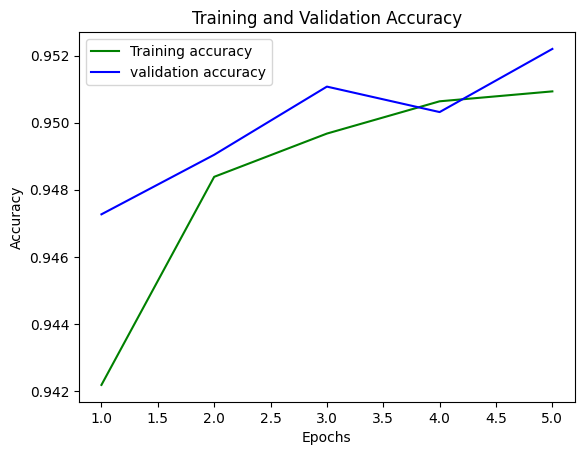

In [32]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,6)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [33]:
print('Testing...')
model.evaluate(X_test_pad, y_test)

Testing...
6531/6531 [==============================] - 214s 33ms/step - loss: 0.1206 - accuracy: 0.9525


[0.12063585966825485, 0.9524976015090942]

In [38]:
model.save("toxic_questions.keras")
loaded_model = load_model("toxic_questions.keras")

##   **Stage 5**: Evaluate the Model and get model predictions on the test dataset (2 Points)








In [39]:
# model predictions on the test data
preds = loaded_model.predict(X_test_pad)
n = np.random.randint(0, 9999)

# Predictions (set the threshold as 0.5)
if preds[n] > 0.5:
  print('predicted sentiment : 1')
else:
  print('precicted sentiment : 0')

# Original Labels
if (y_test[n] == 1):
  print('correct sentiment : 1')
else:
  print('correct sentiment : 0')

6531/6531 [==============================] - 237s 36ms/step
precicted sentiment : 0
correct sentiment : 0


In [40]:
test_questions = pd.read_csv("test_dataset.csv")
test_question_lines = []
test_sentences = list(test_questions['question_text'])


for sen in test_sentences:
    # Call the preprocess_text function on each sentence of the review text
    test_question_lines.append(preprocess_text(sen))



In [41]:
test_tokenizer = Tokenizer()
test_tokenizer.fit_on_texts(test_question_lines)
test_sequences = test_tokenizer.texts_to_sequences(test_question_lines)

In [42]:
# Prediction Test
word_index = test_tokenizer.word_index
print('Found %s unique tokens' % len(word_index))



test_data_pad = pad_sequences(test_sequences, maxlen=100, padding='post', truncating='post')

print('Shape of pad tensor:', test_data_pad.shape)

Found 87248 unique tokens
Shape of pad tensor: (261221, 100)


In [43]:
result = loaded_model.predict(test_data_pad)

8164/8164 [==============================] - 314s 38ms/step


In [49]:
result[100]
prediction = [];

In [45]:
# Predictions (set the threshold as 0.5)
if result[100] > 0.5:
  print('predicted sentiment : 1')
else:
  print('precicted sentiment : 0')



precicted sentiment : 0


In [50]:
len(result)
for i in result :
  if i > 0.5 :
    prediction.append(1)
  else :
    prediction.append(0)

In [70]:
prediction.count(0)
prediction.count(1)

<ipython-input-70-6238cc1c1c9e>:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. ser.count(level=1) should use ser.groupby(level=1).count().
  prediction.count(0)


ValueError: ignored

In [59]:
prediction = pd.Series(prediction)
kaggle_submission = pd.concat([test_questions,prediction],axis=1)



In [60]:
kaggle_submission.head()

,qid,question_text,0
0,d5cacbea9be29bd47a78,Is Minance any good?,0
1,5650c4a236fe3b555c31,Do computers have reserved key strokes?,0
2,b778db4f09f9326195ea,When was the last time that the US had such a ...,0
3,e91c299cffc74a66aaf5,Are you still living in Wasilla?,0
4,2e129e7a85739a73b70a,What distinguishes the acting style of Piolo P...,0


In [62]:
final_kaggle_submission=kaggle_submission.drop('question_text',axis=1)

In [65]:
final_kaggle_submission.columns=['qid','target']
final_kaggle_submission.head()

,qid,target
0,d5cacbea9be29bd47a78,0
1,5650c4a236fe3b555c31,0
2,b778db4f09f9326195ea,0
3,e91c299cffc74a66aaf5,0
4,2e129e7a85739a73b70a,0


In [67]:
final_kaggle_submission.shape

(261221, 2)

In [69]:
final_kaggle_submission['target'].value_counts()

0    257411
1      3810
Name: target, dtype: int64

In [72]:
final_kaggle_submission.to_csv("submission.csv",index=False)